In [100]:
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score  

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('./PS_20174392719_1491204439457_log.csv')

In [4]:
Counter(df['type'])

Counter({'CASH_IN': 1399284,
         'CASH_OUT': 2237500,
         'DEBIT': 41432,
         'PAYMENT': 2151495,
         'TRANSFER': 532909})

In [5]:
a = df.columns.values
a = a.tolist()

In [6]:
for i in a:
    if df[i].isna().any():
        print ('     '+'True ' + i)
    else: 
        print ('False ' + i)

False step
False type
False amount
False nameOrig
False oldbalanceOrg
False newbalanceOrig
False nameDest
False oldbalanceDest
False newbalanceDest
False isFraud
False isFlaggedFraud


In [7]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [8]:
df_test1 = df.drop(['nameOrig', 'nameDest','isFlaggedFraud','type'], axis = 1)

In [9]:
df_test1.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,181.00,181.0,0.00,0.0,0.0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1
4,1,11668.14,41554.0,29885.86,0.0,0.0,0


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [167]:
RF = RandomForestClassifier(n_estimators=20)

In [168]:
Y = df_test1['isFraud']

In [169]:
X = df_test1.drop(['isFraud'],axis=1)

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
RF.fit(X_train, y_train)

In [151]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [152]:
y_pred=RF.predict(X_test)

In [153]:
f1_score( y_test,y_pred,average='micro')

0.9995929349859021

In [154]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [155]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270897
           1       0.96      0.71      0.82      1627

   micro avg       1.00      1.00      1.00   1272524
   macro avg       0.98      0.86      0.91   1272524
weighted avg       1.00      1.00      1.00   1272524



In [30]:
CASH_IN = df[(df['type'] =='CASH_IN') & (df['isFraud'] ==1)]
CASH_OUT = df[(df['type'] =='CASH_OUT') & (df['isFraud'] ==1)]
DEBIT = df[(df['type'] =='DEBIT') & (df['isFraud'] ==1)]
PAYMENT = df[(df['type'] =='PAYMENT') & (df['isFraud'] ==1)]
TRANSFER = df[(df['type'] =='TRANSFER') & (df['isFraud'] ==1)]

In [47]:
len(CASH_IN),len(CASH_OUT),len(DEBIT),len(PAYMENT),len(TRANSFER)

(0, 4116, 0, 0, 4097)

Text(0.5,1,'Transaction type VS Confirmed Fraud')

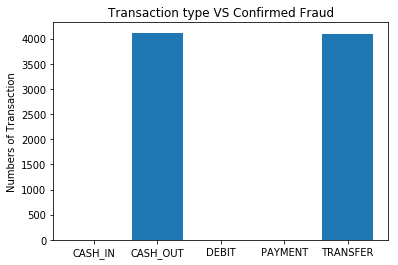

In [59]:
objects = ('CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT','TRANSFER')
y_pos = np.arange(len(objects))
lens = [len(CASH_IN), len(CASH_OUT), len(DEBIT), len(PAYMENT),len(TRANSFER)]

plt.bar(y_pos, lens, align = 'center', alpha = 1)
plt.xticks(y_pos, objects)
plt.ylabel('Numbers of Transaction')
plt.title('Transaction type VS Confirmed Fraud')

In [119]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [120]:
scoring = ['f1_micro']

In [166]:
scores = cross_validate(RF, X, Y, scoring=scoring, cv=5, return_train_score=True)

In [ ]:
scores

In [32]:
CASH_OUT0 = df[(df['type'] =='CASH_OUT') & (df['isFraud'] ==0)]
TRANSFER0 = df[(df['type'] =='TRANSFER') & (df['isFraud'] ==0)]

Text(0.5,1,'Transaction type VS Confirmed Fraud')

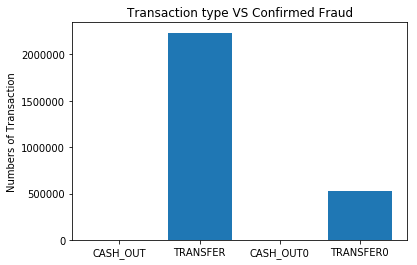

In [58]:
objects = ('CASH_OUT', 'TRANSFER', 'CASH_OUT0', 'TRANSFER0')
y_pos = np.arange(len(objects))
lens = [len(CASH_OUT), len(CASH_OUT0),len(TRANSFER),  len(TRANSFER0)]

plt.bar(y_pos, lens, align = 'center', alpha = 1)
plt.xticks(y_pos, objects)
plt.ylabel('Numbers of Transaction')
plt.title('Transaction type VS Confirmed Fraud')

In [49]:
labels = 'CASH_OUT1', 'CASH_OUT0'
values = [len(CASH_OUT), len(CASH_OUT0)]

([<matplotlib.patches.Wedge at 0x1a123fcb70>,
 [Text(1.09968,0.0265652,'TRANSFER1'), Text(-1.09968,-0.0265652,'TRANSFER0')],
 [Text(0.599825,0.0144901,'0.8%'), Text(-0.599825,-0.0144901,'99.2%')])

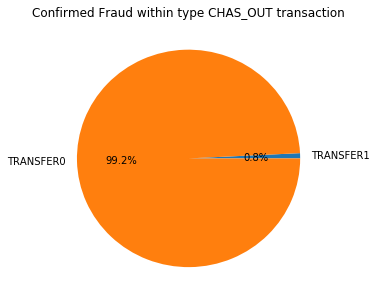

In [56]:
plt.figure(figsize=(5,5))
plt.title('Confirmed Fraud within type CHAS_OUT transaction')
plt.pie(values,labels=labels,autopct='%.1f%%')

([<matplotlib.patches.Wedge at 0x1a0ccd0b00>,
 [Text(1.09968,0.0265652,'TRANSFER1'), Text(-1.09968,-0.0265652,'TRANSFER0')],
 [Text(0.599825,0.0144901,'0.8%'), Text(-0.599825,-0.0144901,'99.2%')])

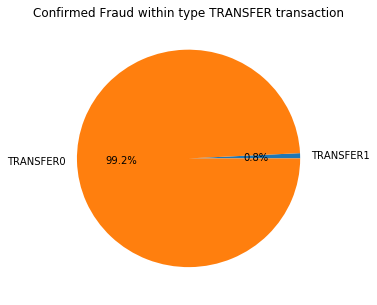

In [57]:
labels = 'TRANSFER1', 'TRANSFER0'
values = [len(TRANSFER), len(TRANSFER0)]

plt.figure(figsize=(5,5))
plt.title('Confirmed Fraud within type TRANSFER transaction')
plt.pie(values,labels=labels,autopct='%.1f%%')

In [91]:
import seaborn as sns  

In [140]:
def plot_roc_curve(fpr, tpr):  
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [141]:
probs = RF.predict_proba(X_test)  
probs = probs[:, 1]  

In [142]:
auc = roc_auc_score(y_test, probs)  
print('AUC: %.6f' % auc) 

AUC: 0.999388


In [143]:
fpr, tpr, thresholds = roc_curve(y_test, probs)  


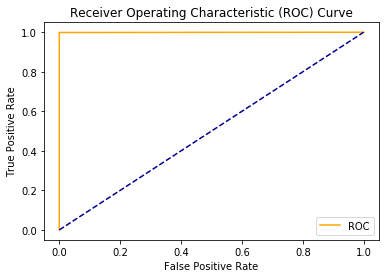

In [144]:
plot_roc_curve(fpr, tpr)  